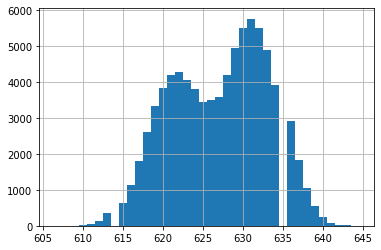

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv('sensor_data_600.txt', delimiter=' ', header=None, names=('date', 'time', 'ir', 'lidar'))

data['lidar'].hist(bins=max(data['lidar']) - min(data['lidar']), align='left')
plt.show()

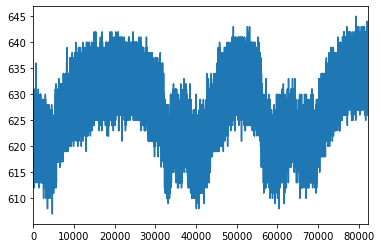

In [3]:
data.lidar.plot()
plt.show()

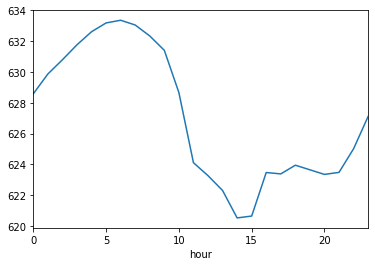

In [5]:
data['hour'] = [e//10000 for e in data.time]
d = data.groupby('hour')
d.lidar.mean().plot()
plt.show()

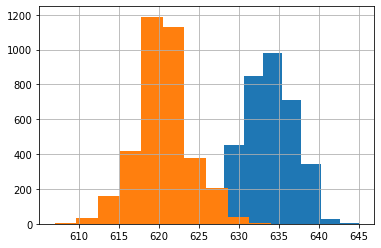

In [6]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

In [7]:
each_hour = {i:d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs/len(data)

probs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.000061,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000097,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,0.000122,0.000255,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000134,0.000401,0.000693,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.000279,0.000510,0.001191,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000085,0.000814,0.001227,0.001725,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000085,0.001349,0.001750,0.002819,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


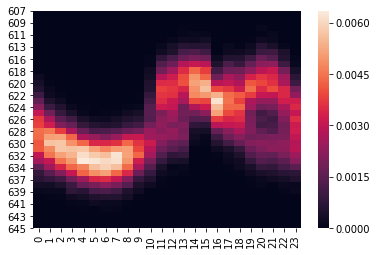

In [8]:
import seaborn as sns 

sns.heatmap(probs)
plt.show()

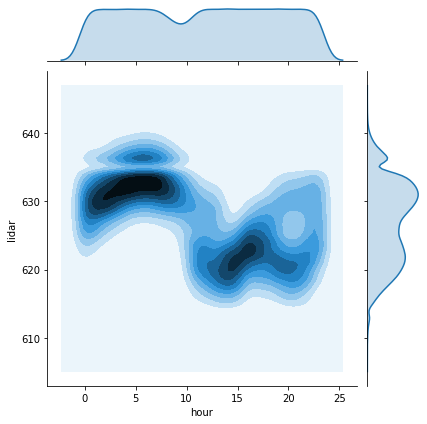

In [9]:
sns.jointplot(data['hour'], data['lidar'], data, kind='kde')
plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,0.028736,0.043098,0.043146,0.043025,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


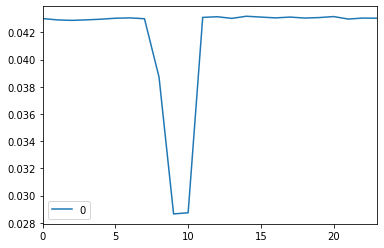

In [11]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()
p_t.transpose()

In [12]:
p_t.sum()

0    1.0
dtype: float64

,607,608,609,610,611,612,613,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,0.031628,0.040498,0.046585,0.050947,0.05198,0.049319,0.046354,0.041725,0.042648,0.043645,0.050996,0.060121,0.066949,0.070048,0.066901,0.059623,0.047776,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


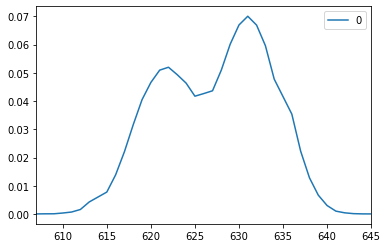

In [13]:
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()
p_z.transpose()

In [14]:
cond_z_t = probs/p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000563,0.001412,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000282,0.002259,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001128,0.002816,0.005931,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000423,0.003101,0.009293,0.016097,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000846,0.006484,0.011828,0.027676,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002960,0.018889,0.028443,0.040102,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002960,0.031294,0.040552,0.065518,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


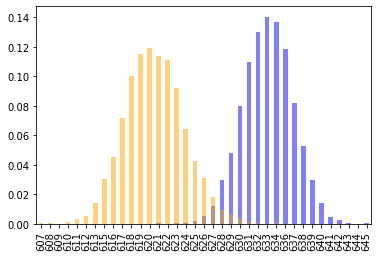

In [15]:
(cond_z_t[6]).plot.bar(color='blue', alpha=0.5)
(cond_z_t[14]).plot.bar(color='orange', alpha=0.5)
plt.show()

In [16]:
cond_t_z = probs.transpose()/probs.transpose().sum()

print('P(z=630) = ', p_z[0][630])
print('P(t=13) = ', p_t[0][13])
print('P(t=13 | z=630) = ', cond_t_z[630][13])
print('Bayes P(z=630 | t=13) = ', cond_t_z[630][13]*p_z[0][630]/p_t[0][13])

print('answer P(z=630 | t=13) = ', cond_z_t[13][630])

P(z=630) =  0.06694936878045224
P(t=13) =  0.043024993620976656
P(t=13 | z=630) =  0.023230490018148822
Bayes P(z=630 | t=13) =  0.036147980796385204
answer P(z=630 | t=13) =  0.036147980796385204


In [17]:
def bayes_estimation(sensor_value, current_estimation):
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value]*current_estimation[i])
    
    return new_estimation/sum(new_estimation)

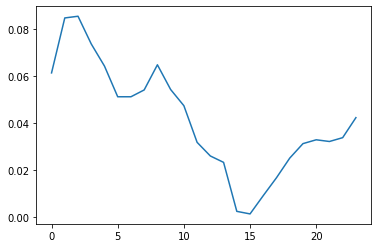

In [18]:
estimation = bayes_estimation(630, p_t[0])
plt.plot(estimation)

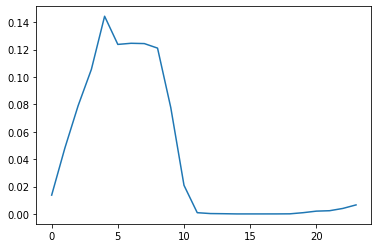

In [19]:
value_5 = [630, 632, 636]

estimation = p_t[0]
for v in value_5:
    estimation = bayes_estimation(v, estimation)

plt.plot(estimation)

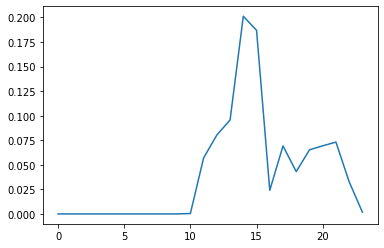

In [20]:
value_5 = [617, 624, 619]

estimation = p_t[0]
for v in value_5:
    estimation = bayes_estimation(v, estimation)

plt.plot(estimation)